In [1]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt

### Протокол с $\frac{\lambda}{4}$

Рассмотрим различные протоколы. Начнём с протокола с $\frac{\lambda}{4}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 3

100%|██████████| 500/500 [04:19<00:00,  1.93it/s]


Mean fidelity: [0.03068589 0.09076068 0.82822328 0.87867258 0.99999998] 	Std fidelity: [3.51612704e-02 8.78063331e-02 1.03243669e-01 9.14299784e-02
 2.94228486e-08]
Mean svx for protocol: [ 1.00000000e+00  8.54429736e-01  1.13585097e-01  7.58623348e-02
 -3.38882019e-09] 	Std s_cvx for protocol: [0.00000000e+00 9.16611615e-02 6.31428759e-02 4.89189893e-02
 8.58856991e-08]


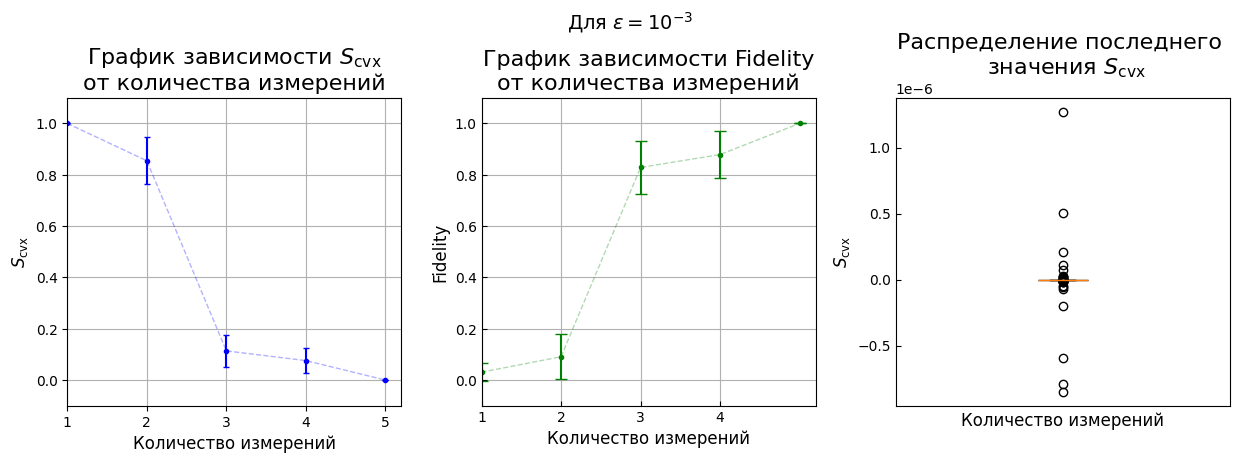

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4 ,5])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3]),\
                               tomography_1.Fidelity(x_min_list[4], x_max_list[4])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [04:21<00:00,  1.91it/s]

Mean fidelity: [0.03182011 0.09108429 0.81840229 0.87624166 0.99999998] 	Std fidelity: [3.63204940e-02 8.00036544e-02 1.06265001e-01 9.25150570e-02
 5.08061878e-09]
Mean svx for protocol: [ 1.00000000e+00  8.56732953e-01  1.21185338e-01  7.91698991e-02
 -2.87179114e-09] 	Std s_cvx for protocol: [0.00000000e+00 9.11263791e-02 6.79829048e-02 5.26957418e-02
 8.36461147e-09]


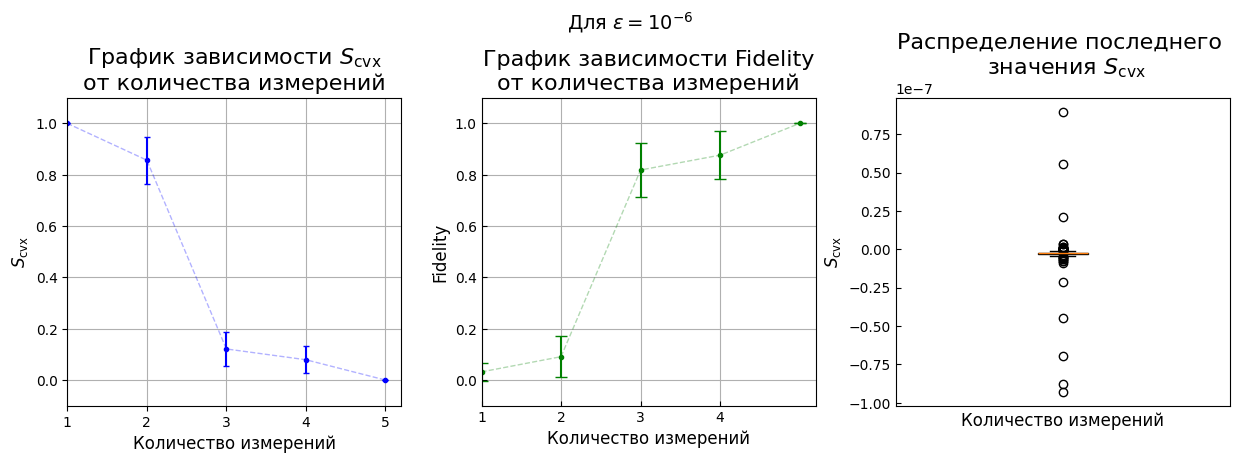

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4 ,5])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3]),\
                               tomography_1.Fidelity(x_min_list[4], x_max_list[4])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

Рассмотрим протокола с $\frac{\lambda}{4}$ без измерения $QWP \; @ \; \frac{\pi}{8}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 1

100%|██████████| 500/500 [03:07<00:00,  2.67it/s]

Mean fidelity: [0.10554189 0.27976415 0.98279597 0.99949111] 	Std fidelity: [0.12821303 0.21669049 0.06938874 0.00082751]
Mean svx for protocol: [1.00000000e+00 7.96022610e-01 1.29330908e-02 7.40832973e-04] 	Std s_cvx for protocol: [0.         0.14543588 0.04736244 0.00080961]


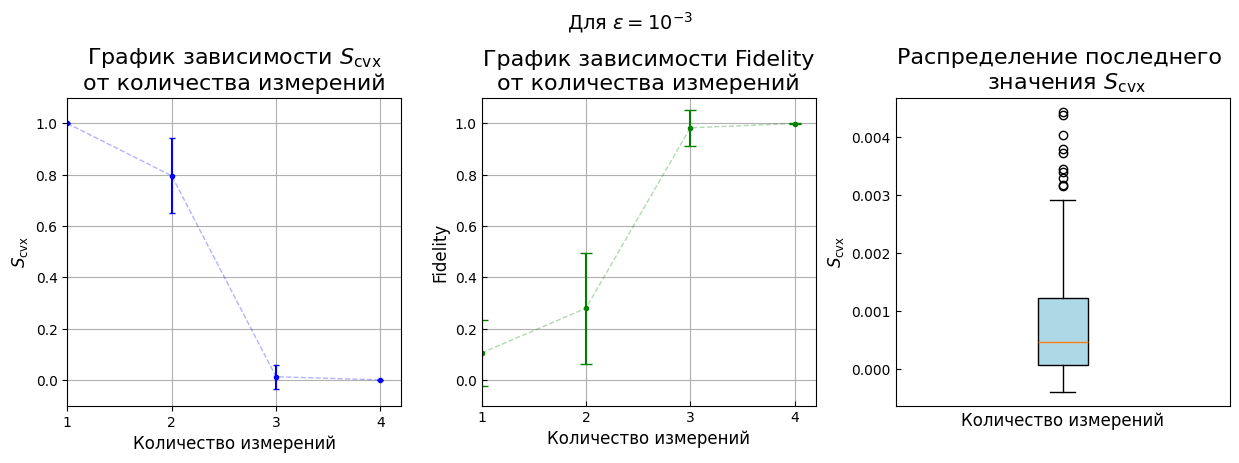

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8), Gl_4(0)]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [03:15<00:00,  2.55it/s]

Mean fidelity: [0.11001331 0.30322821 0.97656611 0.99999992] 	Std fidelity: [1.45127255e-01 2.27573749e-01 8.62403219e-02 5.56500670e-07]
Mean svx for protocol: [1.00000000e+00 7.79089443e-01 1.54013026e-02 4.05321735e-07] 	Std s_cvx for protocol: [0.00000000e+00 1.56653842e-01 5.47452694e-02 6.29254512e-07]


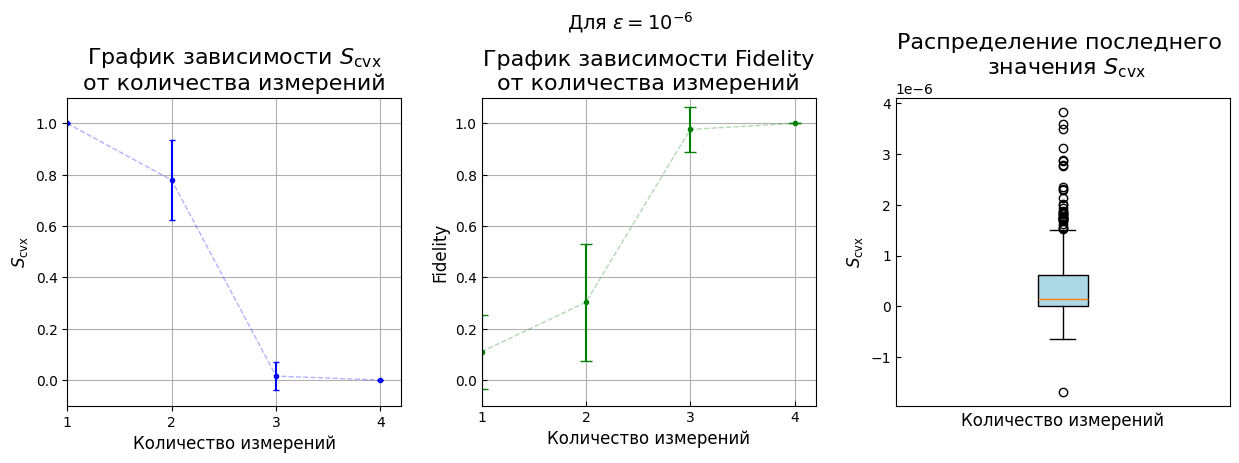

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8), Gl_4(0)]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

Рассмотрим различные протоколы. Рассмотрим протокола с $\frac{\lambda}{4}$ без измерения $QWP \; @ \; \frac{\pi}{8}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 3

100%|██████████| 500/500 [03:14<00:00,  2.57it/s]


Mean fidelity: [0.03161031 0.10041692 0.14843892 0.88617245] 	Std fidelity: [0.03392692 0.09304839 0.10930146 0.08173231]
Mean svx for protocol: [1.         0.85262973 0.78844304 0.07432837] 	Std s_cvx for protocol: [0.         0.09629472 0.10025574 0.04709977]


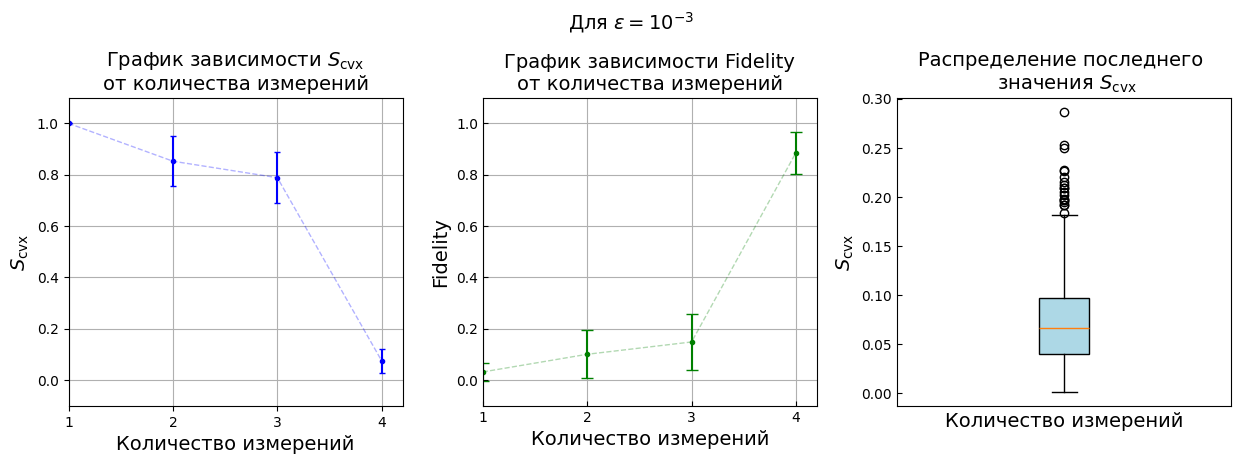

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})

protocol = [Gl_4(0), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])]
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [03:07<00:00,  2.66it/s]

Mean fidelity: [0.03193497 0.09167253 0.15095262 0.87494456] 	Std fidelity: [0.03861646 0.08614755 0.11298257 0.0951731 ]
Mean svx for protocol: [1.         0.85514783 0.79200269 0.07875824] 	Std s_cvx for protocol: [0.         0.08877839 0.09625632 0.05165864]


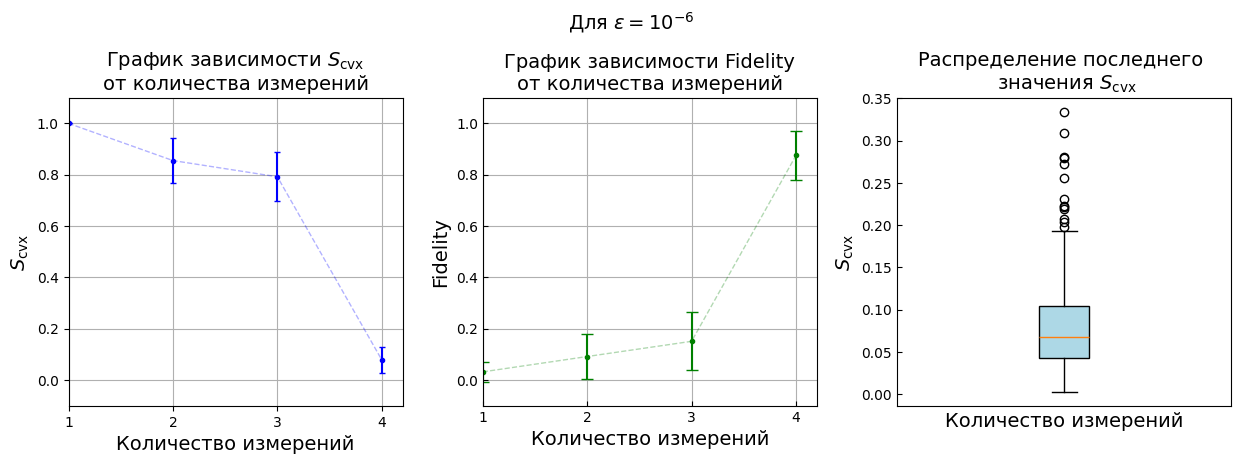

In [7]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

### Протокол с Фёдорова

Теперь рассмотрим протокола с $\frac{\lambda}{4}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 1

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1))]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

 69%|██████▉   | 344/500 [01:29<00:40,  3.81it/s]

 30%|██▉       | 148/500 [01:53<04:04,  1.44it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 500/500 [16:24<00:00,  1.97s/it]  

Mean fidelity: [0.1423038  0.67049593 0.99907522] 	Std fidelity: [0.16599319 0.23917267 0.0299502 ]
Mean svx for protocol: [ 1.          0.21176784 -0.00209759] 	Std s_cvx for protocol: [0.         0.15665729 0.07691685]


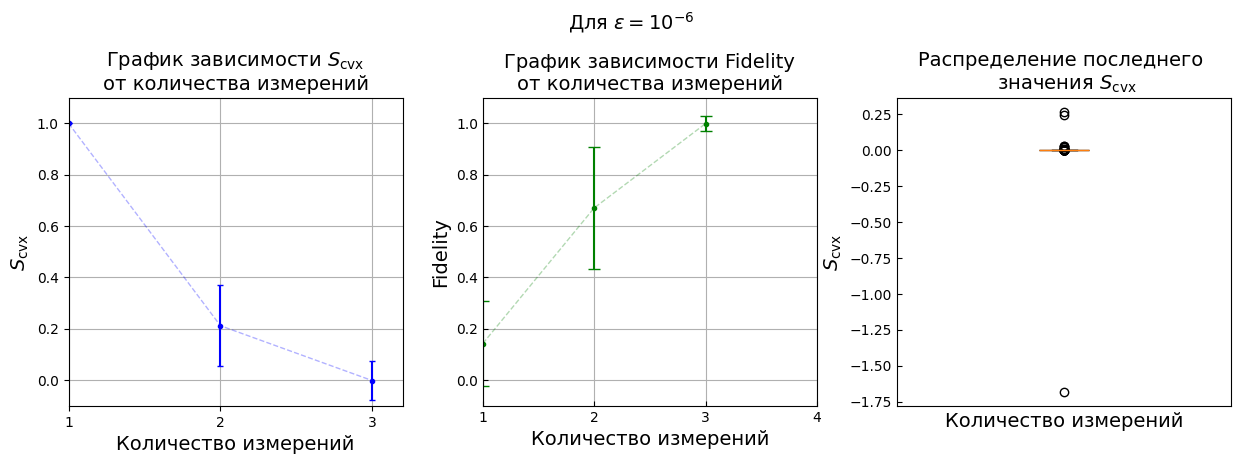

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1))]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

Теперь рассмотрим протокола с $\frac{\lambda}{4} + $ измерение $QWP \; @ \; \frac{\pi}{8}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 1

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1)), Gl_4(pi / 8),]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1)), Gl_4(pi / 8),]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)